In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

In [14]:
# Load the dataset
df=pd.read_csv("data.csv",sep=";")

# Display the first few rows of the dataset to confirm its structure
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [15]:
# Filtering the dataset to include only "Dropout" and "Graduate" students
filtered_df = df[df['Target'].isin(['Dropout', 'Graduate'])]

# Display the filtered dataset
filtered_df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [16]:
# Display the unique values in the 'Target' column to confirm we have only "Dropout" and "Graduate"
filtered_df['Target'].unique()

array(['Dropout', 'Graduate'], dtype=object)

In [17]:
# Extracting the specified columns of interest for the analysis
columns_of_interest = [
    'Marital status', 
    'Mother\'s qualification', 
    'Father\'s qualification', 
    'Mother\'s occupation', 
    'Father\'s occupation', 
    'Target'
]

extracted_df = filtered_df[columns_of_interest]

# Display the first few rows of the extracted dataset to confirm the extraction
extracted_df.head()

,Marital status,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Target
0,1,19,12,5,9,Dropout
1,1,1,3,3,3,Graduate
2,1,37,37,9,9,Dropout
3,1,38,37,5,3,Graduate
4,2,37,38,9,9,Graduate


In [18]:
# Show the general information of the filtered data

extracted_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3630 entries, 0 to 4423
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Marital status          3630 non-null   int64 
 1   Mother's qualification  3630 non-null   int64 
 2   Father's qualification  3630 non-null   int64 
 3   Mother's occupation     3630 non-null   int64 
 4   Father's occupation     3630 non-null   int64 
 5   Target                  3630 non-null   object
dtypes: int64(5), object(1)
memory usage: 198.5+ KB


In [7]:
# General statistics of the filtered data

extracted_df.describe()

,Marital status,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation
count,3630.000000,3630.000000,3630.000000,3630.000000,3630.00000
mean,1.184298,19.986226,22.571625,10.138567,10.28292
std,0.613009,15.585278,15.275453,23.315697,22.40269
min,1.000000,1.000000,1.000000,0.000000,0.00000
25%,1.000000,2.000000,3.000000,4.000000,4.00000
50%,1.000000,19.000000,19.000000,5.000000,7.00000
75%,1.000000,37.000000,37.000000,9.000000,9.00000
max,6.000000,44.000000,44.000000,194.000000,195.00000


In [23]:
# Creating dictionaries for each attribute based on the provided mappings

# Mapping for Marital status
marital_status_mapping = {
    1: 'single', 
    2: 'married', 
    3: 'widower', 
    4: 'divorced', 
    5: 'facto union', 
    6: 'legally separated'
}

# Mapping for Mother's qualification
mothers_qualification_mapping = {
    1: 'Secondary Education, - 12th Year of Schooling or Eq.', 
    2: 'Higher Education - Bachelor\'s Degree', 
    3: 'Higher Education - Degree', 
    4: 'Higher Education - Master\'s', 
    5: 'Higher Education - Doctorate', 
    6: 'Frequency of Higher Education', 
    9: '12th Year of Schooling - Not Completed', 
    10: '11th Year of Schooling - Not Completed', 
    11: '7th Year (Old)', 
    12: 'Other - 11th Year of Schooling', 
    14: '10th Year of Schooling', 
    18: 'General commerce course', 
    19: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.', 
    22: 'Technical-professional course', 
    26: '7th year of schooling', 
    27: '2nd cycle of the general high school course', 
    29: '9th Year of Schooling - Not Completed', 
    30: '8th year of schooling', 
    34: 'Unknown', 
    35: 'Can\'t read or write', 
    36: 'Can read without having a 4th year of schooling', 
    37: 'Basic education 1st cycle (4th/5th year) or equiv.', 
    38: 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.', 
    39: 'Technological specialization course', 
    40: 'Higher education - degree (1st cycle)', 
    41: 'Specialized higher studies course', 
    42: 'Professional higher technical course', 
    43: 'Higher Education - Master (2nd cycle)', 
    44: 'Higher Education - Doctorate (3rd cycle)'
}

# Mapping for Father's qualification
fathers_qualification_mapping = {
    1: 'Secondary Education, - 12th Year of Schooling or Eq.', 
    2: 'Higher Education - Bachelor\'s Degree', 
    3: 'Higher Education - Degree', 
    4: 'Higher Education - Master\'s', 
    5: 'Higher Education - Doctorate', 
    6: 'Frequency of Higher Education', 
    9: '12th Year of Schooling - Not Completed', 
    10: '11th Year of Schooling - Not Completed', 
    11: '7th Year (Old)', 
    12: 'Other - 11th Year of Schooling', 
    13: '2nd year complementary high school course',
    14: '10th Year of Schooling', 
    18: 'General commerce course', 
    19: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.', 
    20: 'Complementary High School Course',
    22: 'Technical-professional course', 
    25: 'Complementary High School Course - not concluded',
    26: '7th year of schooling', 
    27: '2nd cycle of the general high school course', 
    29: '9th Year of Schooling - Not Completed', 
    30: '8th year of schooling', 
    31: 'General Course of Administration and Commerce',
    33: 'Supplementary Accounting and Administration',
    34: 'Unknown', 
    35: 'Can\'t read or write', 
    36: 'Can read without having a 4th year of schooling', 
    37: 'Basic education 1st cycle (4th/5th year) or equiv.', 
    38: 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.', 
    39: 'Technological specialization course', 
    40: 'Higher education - degree (1st cycle)', 
    41: 'Specialized higher studies course', 
    42: 'Professional higher technical course', 
    43: 'Higher Education - Master (2nd cycle)', 
    44: 'Higher Education - Doctorate (3rd cycle)'
}

# Mapping for Mother's occupation
mothers_occupation_mapping = {
    0: 'Student', 
    1: 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers', 
    2: 'Specialists in Intellectual and Scientific Activities', 
    3: 'Intermediate Level Technicians and Professions', 
    4: 'Administrative staff', 
    5: 'Personal Services, Security and Safety Workers and Sellers', 
    6: 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry', 
    7: 'Skilled Workers in Industry, Construction and Craftsmen', 
    8: 'Installation and Machine Operators and Assembly Workers', 
    9: 'Unskilled Workers', 
    10: 'Armed Forces Professions', 
    90: 'Other Situation', 
    99: '(blank)', 
    122: 'Health professionals', 
    123: 'teachers', 
    125: 'Specialists in information and communication technologies (ICT)', 
    131: 'Intermediate level science and engineering technicians and professions', 
    132: 'Technicians and professionals, of intermediate level of health', 
    134: 'Intermediate level technicians from legal, social, sports, cultural and similar services', 
    141: 'Office workers, secretaries in general and data processing operators', 
    143: 'Data, accounting, statistical, financial services and registry-related operators', 
    144: 'Other administrative support staff', 
    151: 'personal service workers', 
    152: 'sellers', 
    153: 'Personal care workers and the like', 
    171: 'Skilled construction workers and the like, except electricians', 
    173: 'Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like', 
    175: 'Workers in food processing, woodworking, clothing and other industries and crafts', 
    191: 'cleaning workers', 
    192: 'Unskilled workers in agriculture, animal production, fisheries and forestry', 
    193: 'Unskilled workers in extractive industry, construction, manufacturing and transport', 
    194: 'Meal preparation assistants'
}

# Mapping for Father's occupation
fathers_occupation_mapping = {
    0: 'Student', 
    1: 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers', 
    2: 'Specialists in Intellectual and Scientific Activities', 
    3: 'Intermediate Level Technicians and Professions', 
    4: 'Administrative staff', 
    5: 'Personal Services, Security and Safety Workers and Sellers', 
    6: 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry', 
    7: 'Skilled Workers in Industry, Construction and Craftsmen', 
    8: 'Installation and Machine Operators and Assembly Workers', 
    9: 'Unskilled Workers', 
    10: 'Armed Forces Professions', 
    90: 'Other Situation', 
    99: '(blank)', 
    101: 'Armed Forces Officers', 
    102: 'Armed Forces Sergeants', 
    103: 'Other Armed Forces personnel', 
    112: 'Directors of administrative and commercial services', 
    114: 'Hotel, catering, trade and other services directors', 
    121: 'Specialists in the physical sciences, mathematics, engineering and related techniques',
    122: 'Health professionals', 
    123: 'teachers', 
    124: 'Specialists in finance, accounting, administrative organization, public and commercial relations',
    131: 'Intermediate level science and engineering technicians and professions', 
    132: 'Technicians and professionals, of intermediate level of health', 
    134: 'Intermediate level technicians from legal, social, sports, cultural and similar services', 
    135: 'Information and communication technology technicians',
    141: 'Office workers, secretaries in general and data processing operators', 
    143: 'Data, accounting, statistical, financial services and registry-related operators', 
    144: 'Other administrative support staff', 
    151: 'personal service workers', 
    152: 'sellers', 
    153: 'Personal care workers and the like', 
    154: 'Protection and security services personnel',
    161: 'Market-oriented farmers and skilled agricultural and animal production workers',
    163: 'Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence',
    171: 'Skilled construction workers and the like, except electricians', 
    172: 'Skilled workers in metallurgy, metalworking and similar',
    174: 'Skilled workers in electricity and electronics',
    175: 'Workers in food processing, woodworking, clothing and other industries and crafts',
    181: 'Fixed plant and machine operators',
    182: 'assembly workers',
    183: 'Vehicle drivers and mobile equipment operators',
    192: 'Unskilled workers in agriculture, animal production, fisheries and forestry',
    193: 'Unskilled workers in extractive industry, construction, manufacturing and transport',
    194: 'Meal preparation assistants',
    195: 'Street vendors (except food) and street service providers'
}
    
# Applying the mappings to the dataset
mapped_df = extracted_df.copy()
mapped_df['Marital status'] = mapped_df['Marital status'].map(marital_status_mapping)
mapped_df['Mother\'s qualification'] = mapped_df['Mother\'s qualification'].map(mothers_qualification_mapping)
mapped_df['Father\'s qualification'] = mapped_df['Father\'s qualification'].map(fathers_qualification_mapping)
mapped_df['Mother\'s occupation'] = mapped_df['Mother\'s occupation'].map(mothers_occupation_mapping)
mapped_df['Father\'s occupation'] = mapped_df['Father\'s occupation'].map(fathers_occupation_mapping)

# Displaying the dataset with applied mappings
mapped_df

,Marital status,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Target
0,single,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other - 11th Year of Schooling,"Personal Services, Security and Safety Workers...",Unskilled Workers,Dropout
1,single,"Secondary Education, - 12th Year of Schooling ...",Higher Education - Degree,Intermediate Level Technicians and Professions,Intermediate Level Technicians and Professions,Graduate
2,single,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,Unskilled Workers,Unskilled Workers,Dropout
3,single,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic education 1st cycle (4th/5th year) or eq...,"Personal Services, Security and Safety Workers...",Intermediate Level Technicians and Professions,Graduate
4,married,Basic education 1st cycle (4th/5th year) or eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Unskilled Workers,Unskilled Workers,Graduate
...,...,...,...,...,...,...
4419,single,"Secondary Education, - 12th Year of Schooling ...","Secondary Education, - 12th Year of Schooling ...","Personal Services, Security and Safety Workers...",Administrative staff,Graduate
4420,single,"Secondary Education, - 12th Year of Schooling ...","Secondary Education, - 12th Year of Schooling ...",Unskilled Workers,Unskilled Workers,Dropout
4421,single,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,Unskilled Workers,Unskilled Workers,Dropout
4422,single,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,"Skilled Workers in Industry, Construction and ...",Administrative staff,Graduate


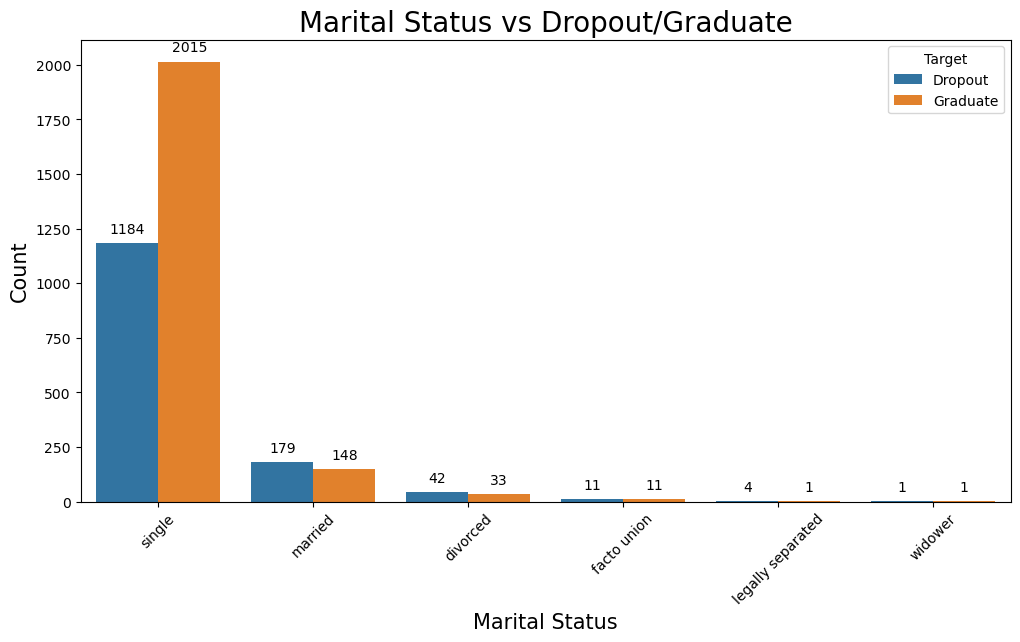

In [29]:
# Plotting the bar plot for marital status
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=mapped_df, x='Marital status', hue='Target', order = mapped_df['Marital status'].value_counts().index)

# Adding titles and labels
plt.title('Marital Status vs Dropout/Graduate', fontsize=20)
plt.xlabel('Marital Status', fontsize=15)
plt.ylabel('Count', fontsize=15)

# Displaying the count on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Show plot
plt.xticks(rotation=45)
plt.show()

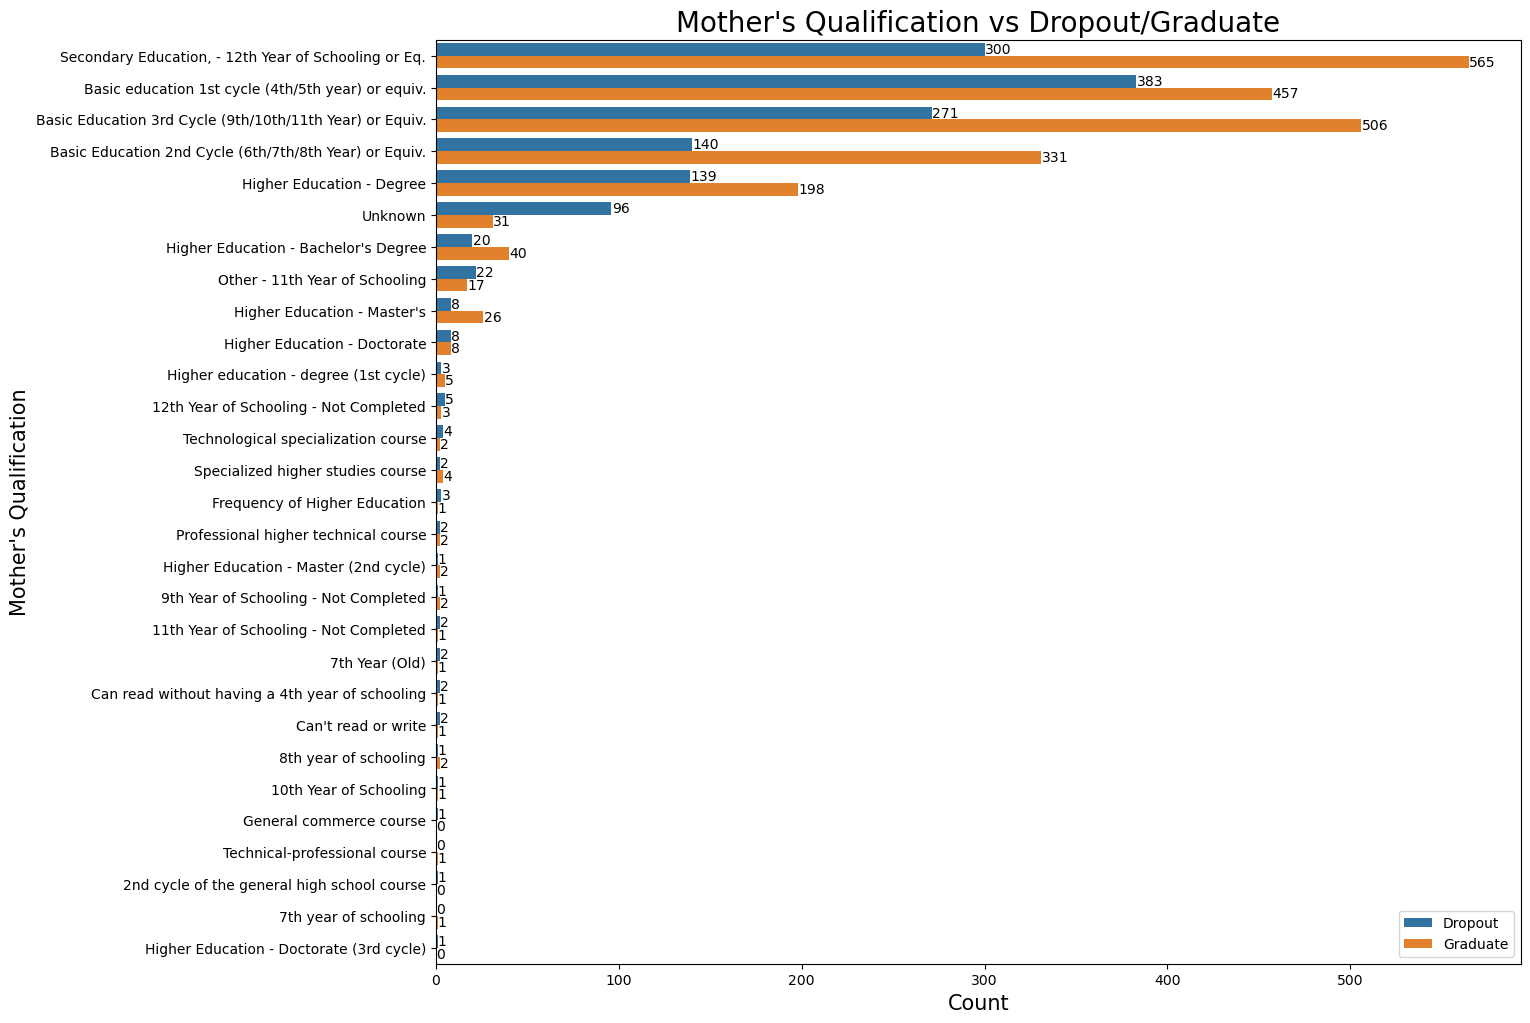

In [45]:
# Plotting the bar plot for mother's qualification
plt.figure(figsize=(14, 12))
ax = sns.countplot(data=mapped_df, y='Mother\'s qualification', hue='Target', 
                   order=mapped_df['Mother\'s qualification'].value_counts().index)

# Adding titles and labels
plt.title('Mother\'s Qualification vs Dropout/Graduate', fontsize=20)
plt.ylabel('Mother\'s Qualification', fontsize=15)
plt.xlabel('Count', fontsize=15)

# Displaying the count beside each bar, removing decimal points
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.1, p.get_y() + p.get_height() / 2.,
             f'{width:.0f}', va='center')
    
    ax.legend(loc='lower right')

# Show plot
plt.show()

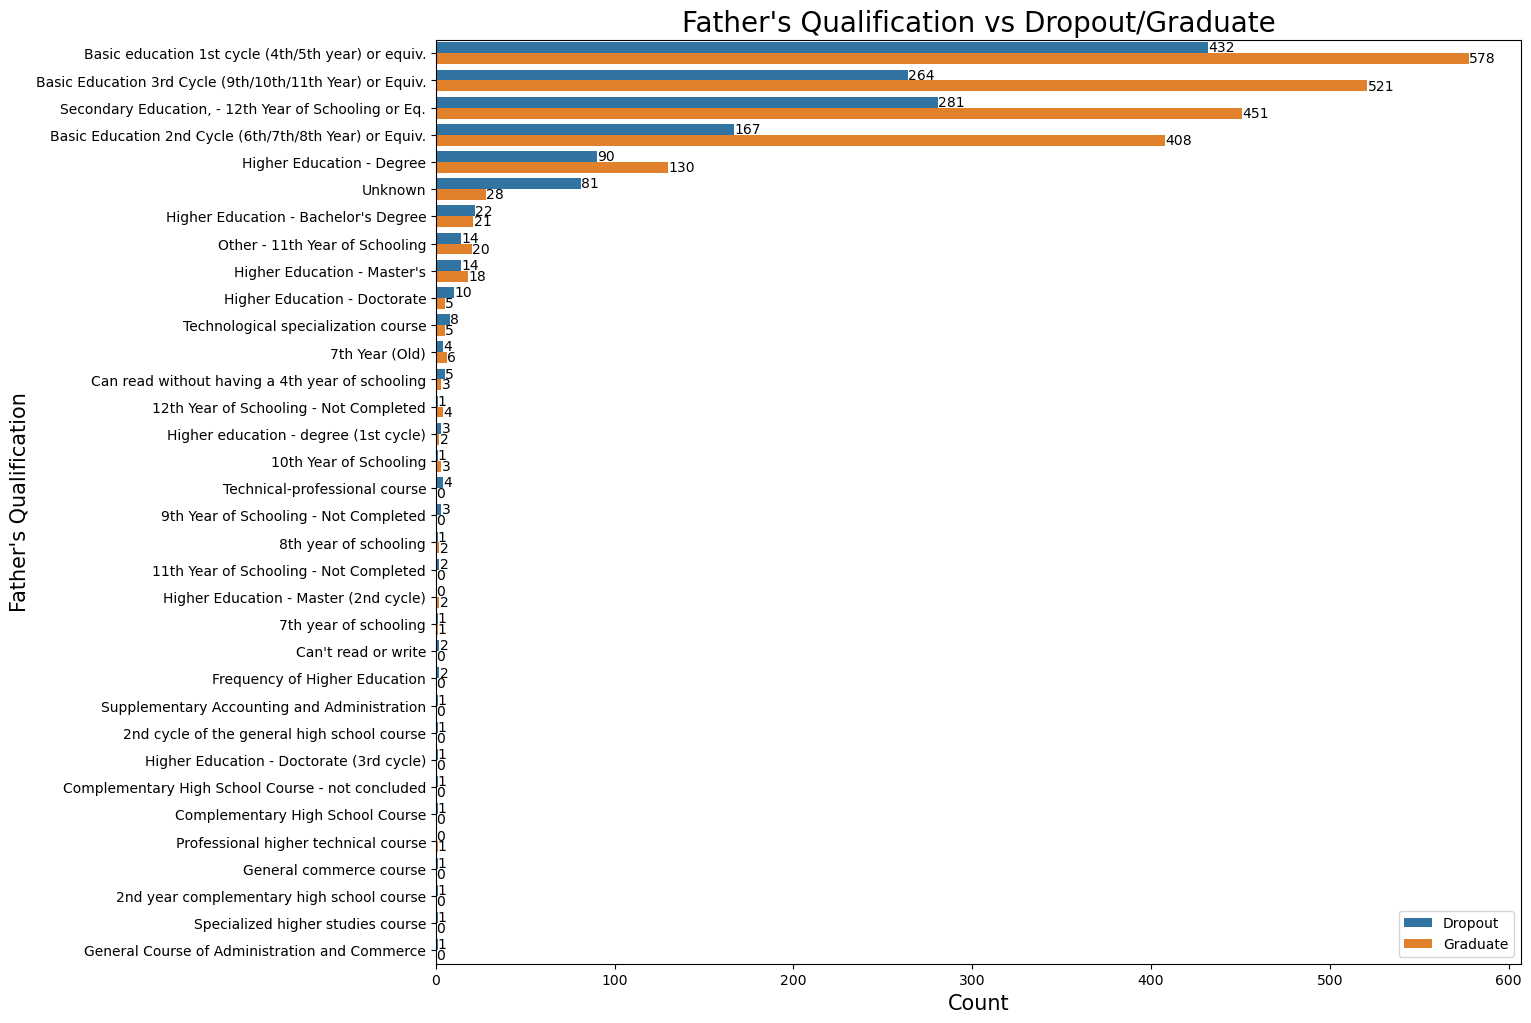

In [42]:
# Plotting the bar plot for father's qualification
plt.figure(figsize=(14, 12))
ax = sns.countplot(data=mapped_df, y='Father\'s qualification', hue='Target', 
                   order=mapped_df['Father\'s qualification'].value_counts().index)

# Adding titles and labels
plt.title('Father\'s Qualification vs Dropout/Graduate', fontsize=20)
plt.ylabel('Father\'s Qualification', fontsize=15)
plt.xlabel('Count', fontsize=15)

# Displaying the count beside each bar, removing decimal points
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.1, p.get_y() + p.get_height() / 2.,
             f'{width:.0f}', va='center')
    
    ax.legend(loc='lower right')

# Show plot
plt.show()

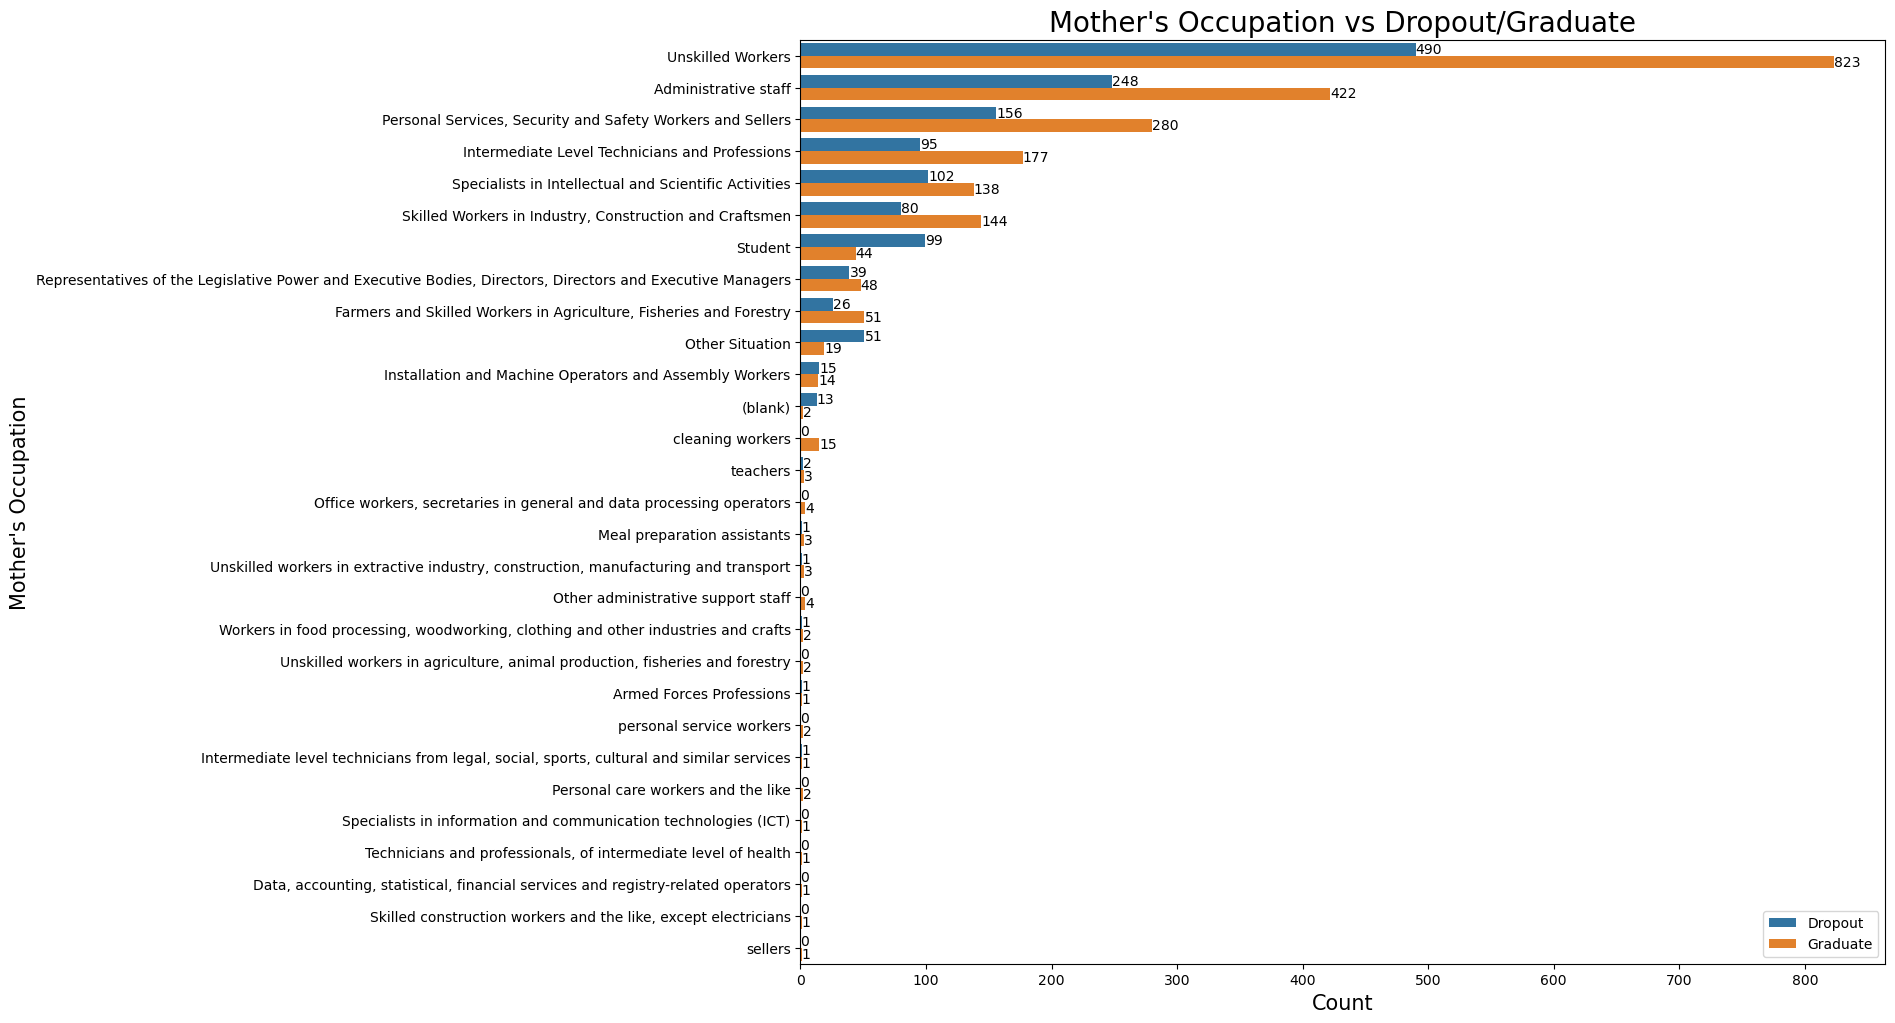

In [43]:
# Plotting the bar plot for mother's occupation
plt.figure(figsize=(14, 12))
ax = sns.countplot(data=mapped_df, y='Mother\'s occupation', hue='Target', 
                   order=mapped_df['Mother\'s occupation'].value_counts().index)

# Adding titles and labels
plt.title('Mother\'s Occupation vs Dropout/Graduate', fontsize=20)
plt.ylabel('Mother\'s Occupation', fontsize=15)
plt.xlabel('Count', fontsize=15)

# Displaying the count beside each bar, removing decimal points
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.1, p.get_y() + p.get_height() / 2.,
             f'{width:.0f}', va='center')
    
    ax.legend(loc='lower right')

# Show plot
plt.show()

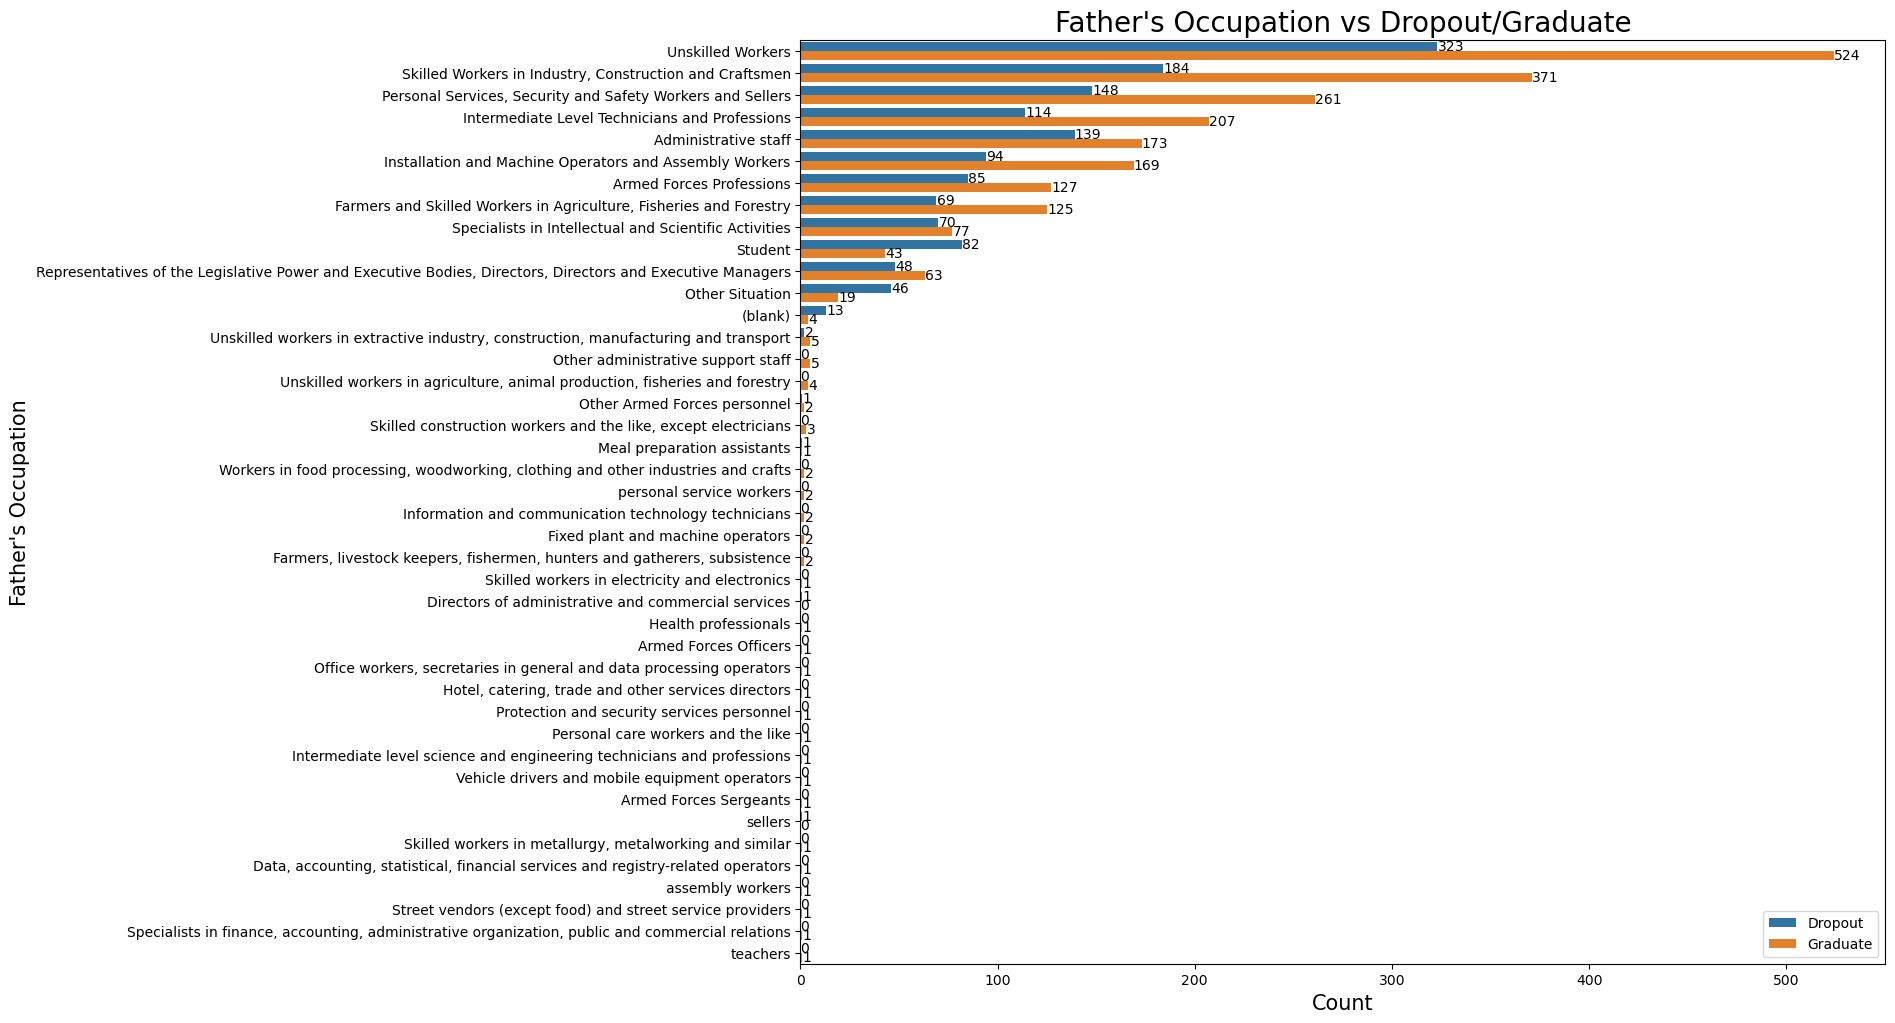

In [44]:
# Plotting the bar plot for mother's occupation
plt.figure(figsize=(14, 12))
ax = sns.countplot(data=mapped_df, y='Father\'s occupation', hue='Target', 
                   order=mapped_df['Father\'s occupation'].value_counts().index)

# Adding titles and labels
plt.title('Father\'s Occupation vs Dropout/Graduate', fontsize=20)
plt.ylabel('Father\'s Occupation', fontsize=15)
plt.xlabel('Count', fontsize=15)

# Displaying the count beside each bar, removing decimal points
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.1, p.get_y() + p.get_height() / 2.,
             f'{width:.0f}', va='center')
    
    ax.legend(loc='lower right')

# Show plot
plt.show()